In [1]:
import os.path

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(style="darkgrid")

In [11]:
SOURCE_DATA_PATH = 'source_data'
DERIVED_DATA_PATH = 'derived_data'

CSV_PATH = os.path.join(SOURCE_DATA_PATH,'vizrisk/BRFS2012.csv')
TSV_PATH = os.path.join(SOURCE_DATA_PATH,'vizrisk/data.tsv')

In [10]:
print 'Record Count: '
print '---------------'
!wc -l '$CSV_PATH'
print '\nLast Record: '
print '---------------'
!tail -n 1 '$CSV_PATH'

Record Count: 
---------------
  475688 source_data/vizrisk/BRFS2012.csv

Last Record: 
---------------
72,99,9,1,120042,20,12,12182012,12,18,2012,00182,1100,2012006323,2012006323,2,13299,4548040.1384,1,,,,,,,,2,3,88,3,2,3,1,3,2,2,2,2,2,,2,2,2,1,2,2,1,3,1,1,59,1,6,,2,1,2,4,3,1,160,503,63,,,,,1,2,,2,2,1,3,,5,3,888,,,,2,,,2,88,,2,,2,,2,,1,5,2,,,,,,,2,,2,,,2,,2,20,2,72999,341.9836182,,341.9836182,1,341.9836182,1,59,5,,319.31956092,1,2,2,1,1,3,1,2,,1,6,6,6,6,8,2,5,3,0,,8,1,5,63,160,7257,2834,3,2,3,2,1,3,1,2,0,1,0,0,1,,1,,,1,2,2,2,2,,2,2,2


In [14]:
data = pd.read_csv(CSV_PATH)
data.head()

,_STATE,_GEOSTR,_DENSTR2,PRECALL,REPNUM,REPDEPTH,FMONTH,IDATE,IMONTH,IDAY,...,_PNEUMO2,_RFSEAT2,_RFSEAT3,_RFMAM2Y,_MAM502Y,_RFPAP32,_RFPSA21,_RFBLDS2,_RFSIGM2,_AIDTST3
0,1,1,1,1,10001,9,1,1102012,1,10,...,9,1,1,2,2,NaN,NaN,2,2,2
1,1,1,1,1,10002,15,1,1212012,1,21,...,NaN,1,1,1,1,NaN,NaN,2,1,1
2,1,1,1,1,10002,16,1,1032012,1,3,...,2,1,1,1,1,1,NaN,2,2,2
3,1,1,1,1,10002,23,1,1102012,1,10,...,1,1,1,NaN,NaN,NaN,1,1,1,2
4,1,1,1,1,10003,28,1,1102012,1,10,...,NaN,1,2,1,1,NaN,NaN,2,1,2


*Change mixed types to strings until cleaning necessary*

In [16]:
data['MRACE'] = data['MRACE'].astype(str)

In [21]:
data['INTVID'] = data['INTVID'].astype(str)  

In [28]:
#PHYSHLTH recodes
data['PHYSHLTH'] = data['PHYSHLTH'].replace({88:0, 77:np.nan, 99:np.nan})
data['PHYSHLTH'].unique()

array([  3.,   4.,   2.,   5.,   0.,   7.,  10.,   6.,  30.,  nan,  20.,
        15.,  14.,   9.,   1.,   8.,  19.,  17.,  21.,  28.,  12.,  25.,
        18.,  26.,  13.,  16.,  29.,  22.,  27.,  11.,  23.,  24.])

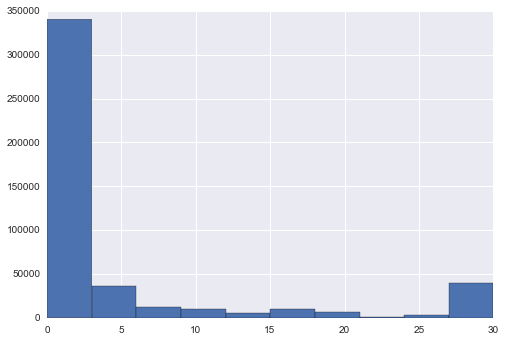

In [25]:
data['PHYSHLTH'].hist()

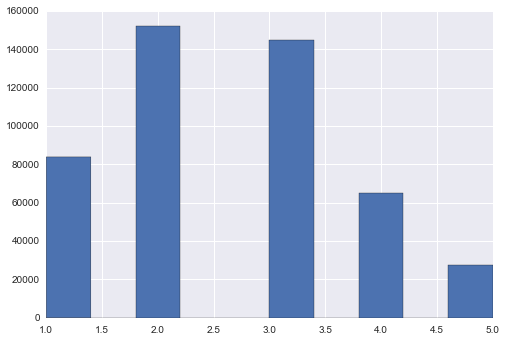

In [29]:
#GENHLTH recodes
data['GENHLTH'] = data['GENHLTH'].replace({7:np.nan, 9:np.nan}) 
data['GENHLTH'].hist()

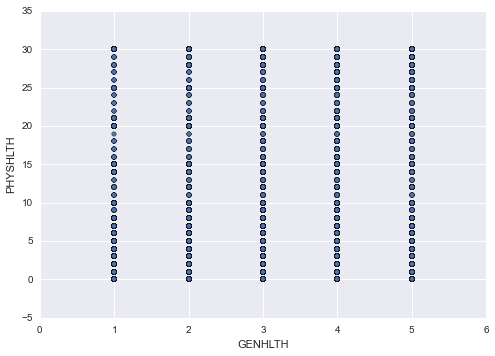

In [30]:
data.plot(kind='scatter', x='GENHLTH', y='PHYSHLTH');